<a href="https://colab.research.google.com/github/The-DigitalAcademy/TrendHunt-Application/blob/Model/Image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [334]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/my data/train",target_size=(255,255))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/my data/validation", target_size=(255,255))

Found 69 images belonging to 6 classes.
Found 70 images belonging to 6 classes.


In [335]:
BATCH_SIZE = 10  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [336]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [337]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory="/content/drive/MyDrive/my data/train",
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 69 images belonging to 6 classes.


In [338]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory="/content/drive/MyDrive/my data/validation",
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 70 images belonging to 6 classes.


In [339]:
sample_training_images, _ = next(train_data_gen)

In [340]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

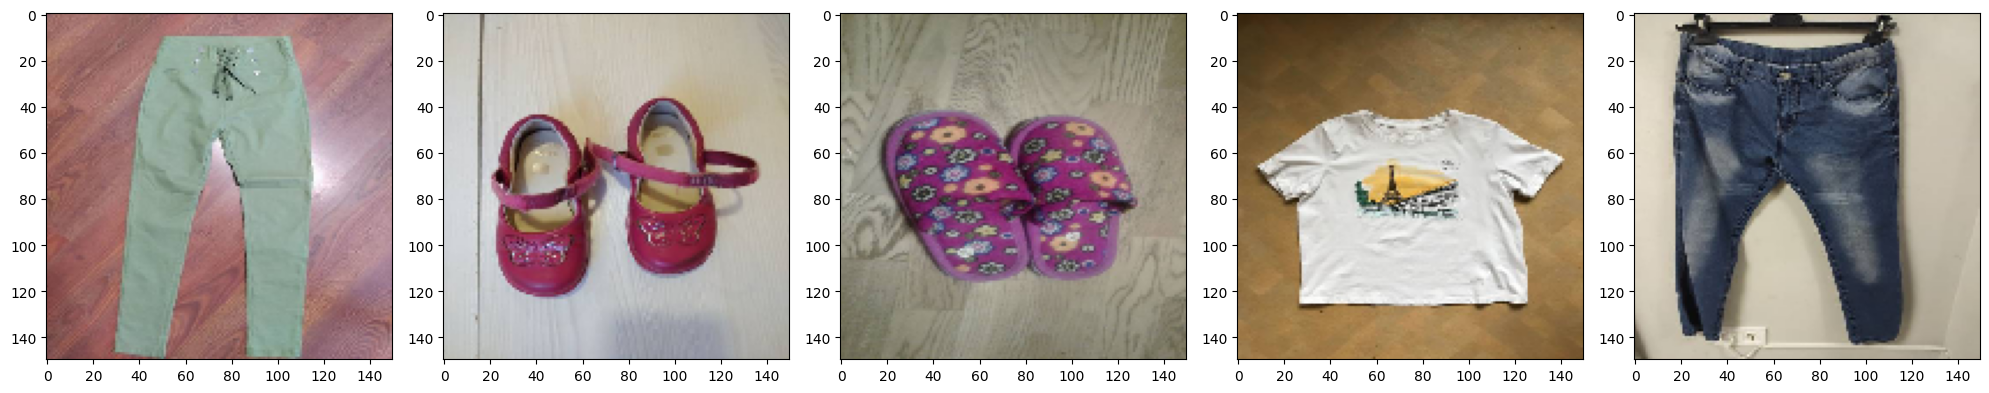

In [341]:
plotImages(sample_training_images[:5])  # Plot images 0-4

In [342]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6)

])

In [343]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [344]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, 72, 72, 128)       36992     
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_84 (Conv2D)          (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 17, 17, 128)    

In [345]:
# Fit the model
history = model.fit(
    train_data_gen,
    epochs=20,  # You can adjust the number of epochs as needed
    validation_data=val_data_gen
)

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_data_gen)
print("Validation accuracy: {:.2f}%".format(accuracy * 100))



Epoch 1/20
7/7 [==============================] - 9s 1s/step - loss: 1.9173 - accuracy: 0.1304 - val_loss: 1.8019 - val_accuracy: 0.1429
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 1.7937 - accuracy: 0.1739 - val_loss: 1.7956 - val_accuracy: 0.1429
Epoch 3/20
7/7 [==============================] - 8s 1s/step - loss: 1.7614 - accuracy: 0.2174 - val_loss: 1.7854 - val_accuracy: 0.1714
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 1.7249 - accuracy: 0.2319 - val_loss: 1.7619 - val_accuracy: 0.1429
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 1.6638 - accuracy: 0.3478 - val_loss: 1.6903 - val_accuracy: 0.2429
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 1.5685 - accuracy: 0.3623 - val_loss: 1.8096 - val_accuracy: 0.2857
Epoch 7/20
7/7 [==============================] - 8s 1s/step - loss: 1.6116 - accuracy: 0.4058 - val_loss: 1.7045 - val_accuracy: 0.2714
Epoch 8/20
7/7 [=========================

In [349]:
# r = model.fit_generator(
#     generator=train_data_gen,
#     steps_per_epoch=len(train_data_gen),
#     epochs=10,
#     validation_data=val_data_gen,
#     validation_steps=len(val_data_gen)
# )

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()